In [6]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import time 

In [8]:
df= pd.read_csv(r'C:\Users\lakshya\Documents\Train_Data.csv')
tdf= pd.read_csv(r'C:\Users\lakshya\Documents\Test_Data.csv')

In [12]:

df.shape

(86845, 43)

In [14]:
num_cols = df._get_numeric_data().columns 
tnum_cols = tdf._get_numeric_data().columns  

cate_cols = list(set(df.columns)-set(num_cols)) 
tcate_cols = list(set(tdf.columns)-set(tnum_cols))   
tcate_cols 

['flag', 'protocoltype', 'service']

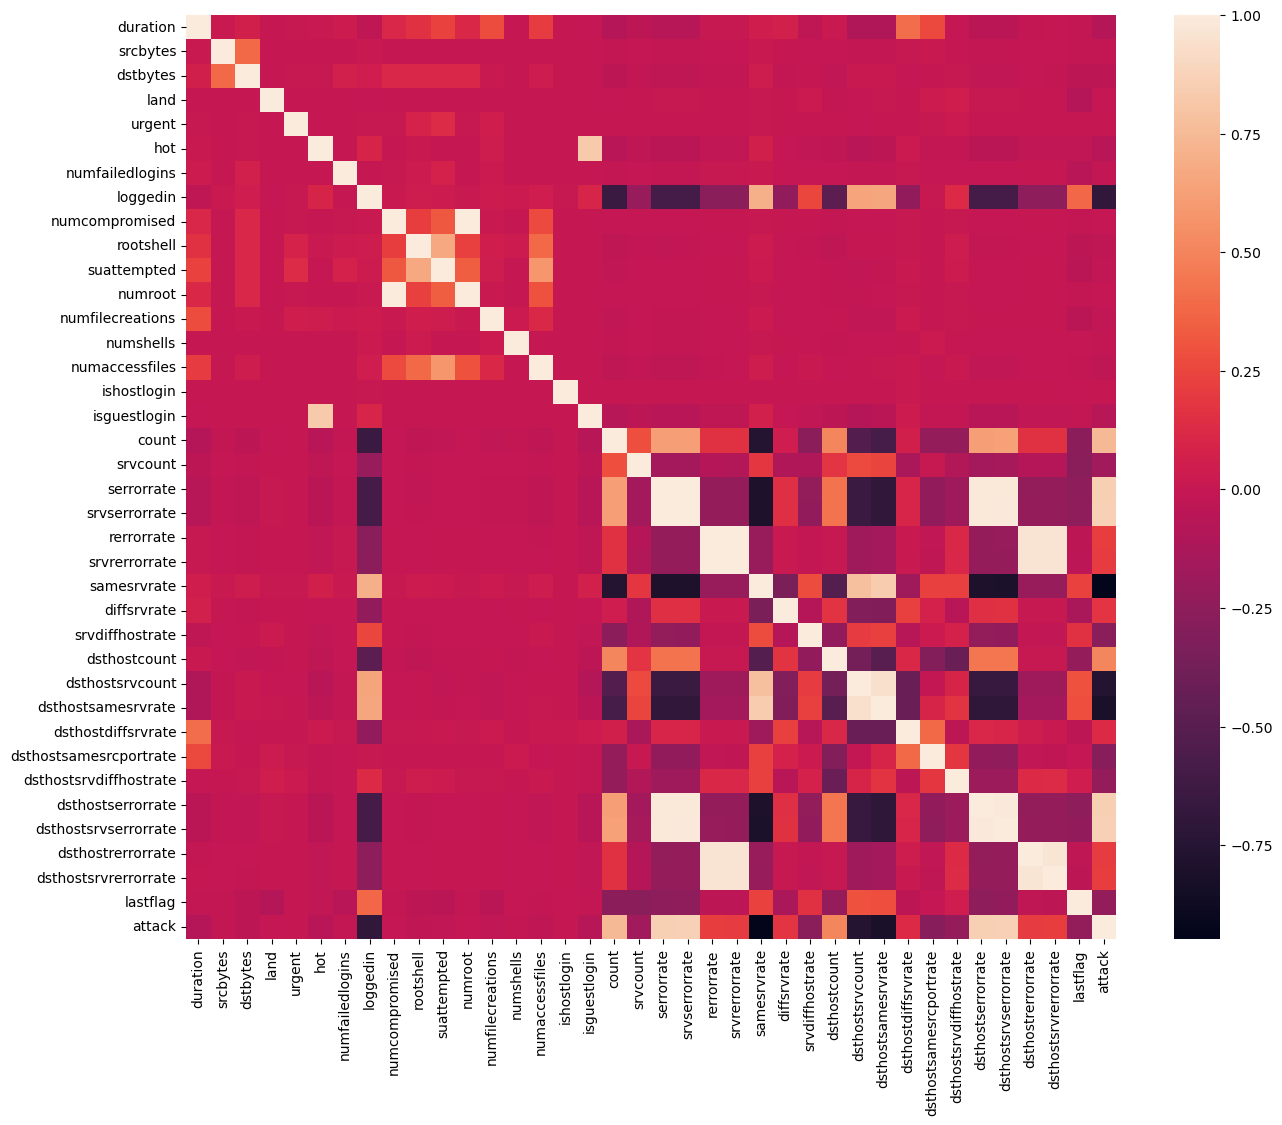

In [16]:
tdf = df.dropna() # drop columns with NaN 
tdf= tdf.dropna()

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values 
cols_to_keep = [col for col in df.columns if df.columns.get_loc(col) not in [1, 2, 3]]
num_c = df[cols_to_keep]

tdf = tdf[[col for col in tdf if tdf[col].nunique() > 1]]# keep columns where there are more than 1 unique values 
tcols_to_keep = [col for col in tdf.columns if tdf.columns.get_loc(col) not in [1, 2, 3]]
tnum_c = tdf[tcols_to_keep]


corr = tnum_c.corr() 
  
plt.figure(figsize =(15, 12)) 
  
sns.heatmap(corr) 
  
plt.show() 

In [18]:
 

# This variable is highly correlated with num_compromised and should be ignored for analysis. 
#(Correlation = 0.9938277978738366) 
df.drop('numroot', axis = 1, inplace = True) 
tdf.drop('numroot', axis = 1, inplace = True)

# This variable is highly correlated with serror_rate and should be ignored for analysis. 
#(Correlation = 0.9983615072725952) 
df.drop('srvserrorrate', axis = 1, inplace = True)
tdf.drop('srvserrorrate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9947309539817937) 
df.drop('srvrerrorrate', axis = 1, inplace = True)
tdf.drop('srvrerrorrate', axis = 1, inplace = True)

# This variable is highly correlated with srv_serror_rate and should be ignored for analysis. 
#(Correlation = 0.9993041091850098) 
df.drop('dsthostsrvserrorrate', axis = 1, inplace = True)
tdf.drop('dsthostsrvserrorrate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9869947924956001) 
df.drop('dsthostserrorrate', axis = 1, inplace = True)
tdf.drop('dsthostserrorrate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9821663427308375) 
df.drop('dsthostrerrorrate', axis = 1, inplace = True)
tdf.drop('dsthostrerrorrate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9851995540751249) 
df.drop('dsthostsrvrerrorrate', axis = 1, inplace = True)
tdf.drop('dsthostsrvrerrorrate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9865705438845669) 
df.drop('dsthostsamesrvrate', axis = 1, inplace = True) 
tdf.drop('dsthostsamesrvrate', axis = 1, inplace = True) 


In [20]:
# protocol_type feature mapping 
pmap = {'icmp':0, 'tcp':1, 'udp':2} 
df['protocoltype'] = df['protocoltype'].map(pmap)

tpmap = {'icmp':0, 'tcp':1, 'udp':2} 
tdf['protocoltype'] = tdf['protocoltype'].map(tpmap)

In [22]:
# flag feature mapping 
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10} 
df['flag'] = df['flag'].map(fmap)

tfmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10} 
tdf['flag'] = tdf['flag'].map(tfmap)

In [24]:
 
df.drop('service', axis = 1, inplace = True) 
 
tdf.drop('service', axis = 1, inplace = True) 


In [26]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

In [28]:
df.columns

Index(['duration', 'protocoltype', 'flag', 'srcbytes', 'dstbytes', 'land',
       'urgent', 'hot', 'numfailedlogins', 'loggedin', 'numcompromised',
       'rootshell', 'suattempted', 'numfilecreations', 'numshells',
       'numaccessfiles', 'ishostlogin', 'isguestlogin', 'count', 'srvcount',
       'serrorrate', 'rerrorrate', 'samesrvrate', 'diffsrvrate',
       'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'lastflag', 'attack'],
      dtype='object')

In [30]:
from sklearn.compose import ColumnTransformer
import numpy as np
# Splitting the dataset 
print(df.shape) 
  
# Target variable and train set 
y = df[['attack']] 
X = df.drop(['attack', ], axis = 1) 
target= "attack"
ref_col= df[:]
X=X.values


sc = MinMaxScaler() 
X = sc.fit_transform(X) 
  
# Split test and train data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 45) 
print(X_train.shape, X_test.shape) 
print(y_train.shape, y_test.shape)

(86845, 32)
(60791, 31) (26054, 31)
(60791, 1) (26054, 1)


Training time:  0.03138446807861328


In [170]:
 
start_time = time.time() 
y_test_pred = clfg.predict(X_train) 
end_time = time.time() 
print("Testing time: ", end_time-start_time) 


Testing time:  0.03854203224182129


In [172]:
 
print("Train score is:", clfg.score(X_train, y_train)) 
print("Test score is:", clfg.score(X_test, y_test)) 



Train score is: 0.9874540267418279
Test score is: 0.9887295439478


In [32]:
 
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier 

clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4) 
start_time = time.time() 
clfd.fit(X_train, y_train.values.ravel()) 
end_time = time.time() 
print("Training time: ", end_time-start_time) 



Training time:  0.13948702812194824


In [34]:
 
start_time = time.time() 
y_test_pred = clfd.predict(X_train) 
end_time = time.time() 
print("Testing time: ", end_time-start_time) 



Testing time:  0.015463590621948242


In [36]:
 
print("Train score is:", clfd.score(X_train, y_train)) 
print("Test score is:", clfd.score(X_test, y_test)) 



Train score is: 0.9995394055041043
Test score is: 0.9991939817302525


In [180]:
 
from sklearn.ensemble import RandomForestClassifier 

clfr = RandomForestClassifier(n_estimators = 30) 
start_time = time.time() 
clfr.fit(X_train, y_train.values.ravel()) 
end_time = time.time() 
print("Training time: ", end_time-start_time) 



Training time:  0.5207440853118896


In [182]:
 
start_time = time.time() 
y_test_pred = clfr.predict(X_train) 
end_time = time.time() 
print("Testing time: ", end_time-start_time) 



Testing time:  0.0523684024810791


In [184]:
 
print("Train score is:", clfr.score(X_train, y_train)) 
print("Test score is:", clfr.score(X_test, y_test)) 



Train score is: 1.0
Test score is: 0.9998255347360341


In [186]:
 
from sklearn.svm import SVC 

clfs = SVC(gamma = 'scale') 
start_time = time.time() 
clfs.fit(X_train, y_train.values.ravel()) 
end_time = time.time() 
print("Training time: ", end_time-start_time) 



Training time:  0.5343682765960693


In [188]:
 
start_time = time.time() 
y_test_pred = clfs.predict(X_train) 
end_time = time.time() 
print("Testing time: ", end_time-start_time) 



Testing time:  0.6559624671936035


In [190]:
 
print("Train score is:", clfs.score(X_train, y_train)) 
print("Test score is:", clfs.score(X_test, y_test)) 



Train score is: 0.999845323617365
Test score is: 0.999441711155309


In [192]:
 
from sklearn.linear_model import LogisticRegression 

clfl = LogisticRegression(max_iter = 1200000) 
start_time = time.time() 
clfl.fit(X_train, y_train.values.ravel()) 
end_time = time.time() 
print("Training time: ", end_time-start_time) 



Training time:  0.06794929504394531


In [194]:
 
start_time = time.time() 
y_test_pred = clfl.predict(X_train) 
end_time = time.time() 
print("Testing time: ", end_time-start_time) 


Testing time:  0.0038716793060302734


In [196]:
 
print("Train score is:", clfl.score(X_train, y_train)) 
print("Test score is:", clfl.score(X_test, y_test)) 



Train score is: 0.9995015983226205
Test score is: 0.9993719250497226


In [198]:
 
from sklearn.ensemble import GradientBoostingClassifier 

clfg = GradientBoostingClassifier(random_state = 0) 
start_time = time.time() 
clfg.fit(X_train, y_train.values.ravel()) 
end_time = time.time() 
print("Training time: ", end_time-start_time) 



Training time:  6.719359874725342


In [199]:
 
start_time = time.time() 
y_test_pred = clfg.predict(X_train) 
end_time = time.time() 
print("Testing time: ", end_time-start_time) 



Testing time:  0.07007241249084473


In [200]:
 
print("Train score is:", clfg.score(X_train, y_train)) 
print("Test score is:", clfg.score(X_test, y_test)) 



Train score is: 1.0
Test score is: 0.9997906416832408


In [38]:
import joblib

In [44]:
joblib.dump(clfd,r"C:\Users\lakshya\Documents\hack2_model.pkl")

['C:\\Users\\lakshya\\Documents\\hack2_model.pkl']

In [48]:
model = joblib.load(r"C:\Users\lakshya\Documents\hack2_model.pkl")

In [68]:
y_new= tdf[['attack']]
X_new = tdf.drop(['attack', ], axis = 1)
X_new= X_new.values
predictions= model.predict(X_new)

model.score(X_new,y_new)

0.9906154643330071

In [70]:
DT_predict= predictions

In [72]:
pred_dt_df = pd.DataFrame(DT_predict)

In [74]:
pred_dt_df.to_csv(r'C:\Users\lakshya\Documents\result.csv', index=False)